<a href="https://colab.research.google.com/github/Rajat-Sri/Capstone-3-Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Cardiovascular Risk Prediction**



##### **Project Type**    - Supervised Machine Learning(Classification Problem)
##### **Contribution**    - Individual
##### **Team Member**     - Rajat Srivastava

# **Project Summary -**

Busines problem

Assumption

Research questions

hypothesis

analysis and findings

conclusion/solutions/suggestions

# **GitHub Link -**

https://github.com/Rajat-Sri/Capstone-3-Cardiovascular-Risk-Prediction

# **Problem Statement**


The term “heart disease” is often used interchangeably with the term “cardiovascular disease”.Heart disease is one of the biggest causes of mortality among the population of the world. Prediction of cardiovascular disease is regarded as one of the most important subjects in the section of clinical data analysis.

There is an an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.

We have been provided dataset with the goal of creating a classification model to predict whether the patient has a 10-year risk of future coronary heart disease (CHD) or not. 

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [10]:
#Importing important libraries and modules
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for handing imbalanced data
from imblearn.over_sampling import SMOTE

# for data splitting, transforming and model training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# for model evaluation
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

#to ignore warnings
import warnings    
warnings.filterwarnings('ignore')

### Dataset Loading

In [11]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Importing the dataset

dataset = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Projects/Capstone 3/data_cardiovascular_risk.csv')

### Dataset First View

In [13]:
# Dataset First Look

dataset.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [14]:
# Dataset Rows & Columns count

dataset.shape

(3390, 17)

### Dataset Information

In [15]:
# Dataset Info

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [16]:
# Dataset Duplicate Value Count

len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [17]:
# Missing Values/Null Values Count

missing = dataset.columns[dataset.isnull().any()].tolist()

print('Missing dataset Count')
print(dataset[missing].isnull().sum().sort_values(ascending = False))
print('--'*12)
print('Missing dataset Percentage')
print(round(dataset[missing].isnull().sum().sort_values(ascending = False)/len(dataset)*100,2))

Missing dataset Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
------------------------
Missing dataset Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


<Axes: >

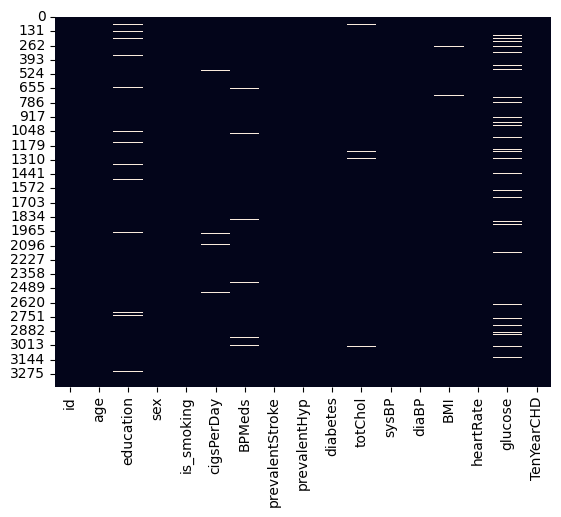

In [18]:
# Visualizing the missing values

# Checking Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

- Dataset contains 3390 rows and 17 columns.
- Dataset dose not contain any duplicate values.
- Dataset contains multiple columns with missing values.
- Missing dataset Count

 - glucose       304
 - education      87
 -  BPMeds         44
 - totChol        38
 - cigsPerDay     22
 - BMI            14
 - heartRate       1